# Import Data/ packages

In [52]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.api as sm
import math
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
train=pd.read_csv("/content/drive/MyDrive/NFT Price Prediction/dataset/nfts_train.csv")

In [55]:
train.head()

,global_index,nft_id,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_date,last_sale_price
0,21928,0,49,2.000000,NaN,NaN,NaN,2022-11,1.266732
1,32621,0,45,97.077216,NaN,NaN,NaN,2021-08,1.200357
2,32622,1,45,139.453086,NaN,NaN,NaN,2022-08,3.180572
3,32623,2,45,127.753445,NaN,NaN,NaN,2021-08,3.502910
4,32624,3,45,112.315719,NaN,NaN,NaN,2022-09,4.009567


In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309910 entries, 0 to 309909
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   global_index         309910 non-null  int64  
 1   nft_id               309910 non-null  int64  
 2   collection_id        309910 non-null  int64  
 3   rarity_score         309910 non-null  float64
 4   openrarity_score     80480 non-null   float64
 5   openrarity_rank      80480 non-null   float64
 6   openrarity_max_rank  80480 non-null   float64
 7   last_sale_date       309910 non-null  object 
 8   last_sale_price      309910 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 21.3+ MB


In [57]:
test=pd.read_csv('/content/drive/MyDrive/NFT Price Prediction/dataset/nfts_predict.csv')

In [58]:
test.head()

,global_index,nft_id,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_date
0,0,0,29,176.364208,NaN,NaN,NaN,2022-06
1,1,1,29,207.209228,NaN,NaN,NaN,2022-05
2,2,2,29,157.293414,NaN,NaN,NaN,2022-10
3,3,3,29,173.372185,NaN,NaN,NaN,2022-06
4,4,4,29,190.077584,NaN,NaN,NaN,2022-06


In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181214 entries, 0 to 181213
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   global_index         181214 non-null  int64  
 1   nft_id               181214 non-null  int64  
 2   collection_id        181214 non-null  int64  
 3   rarity_score         181214 non-null  float64
 4   openrarity_score     38626 non-null   float64
 5   openrarity_rank      38626 non-null   float64
 6   openrarity_max_rank  38626 non-null   float64
 7   last_sale_date       181214 non-null  object 
dtypes: float64(4), int64(3), object(1)
memory usage: 11.1+ MB


In [60]:
train['global_index'].unique()

array([ 21928,  32621,  32622, ..., 590225, 590226, 590227])

In [61]:
test['global_index'].unique()

array([     0,      1,      2, ..., 618139, 618140, 618141])

In [62]:
collections=pd.read_csv('/content/drive/MyDrive/NFT Price Prediction/dataset/collections.csv')
collections=collections.iloc[:,1:]
collections.head()

,collection_id,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium
0,19,1000,2021-04,verified,4,own,500.0,250,False,False,True,True,True
1,45,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False
2,44,10000,2022-04,verified,8,own,500.0,250,True,False,True,True,False
3,53,9999,2022-07,verified,9,own,900.0,250,False,False,True,True,False
4,6,9602,2021-06,verified,8,own,NaN,250,False,False,True,True,False


In [63]:
twitter=pd.read_csv('/content/drive/MyDrive/NFT Price Prediction/dataset/collections_twitter_stats.csv')
twitter=twitter.iloc[:,1:]
twitter.head()

,collection_id,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets
0,0,2,183.000000,8.500000,41.000000,123,3,6,243,14,76
1,1,16,36.375000,3.562500,13.937500,0,0,0,125,21,34
2,2,1,15.000000,9.000000,1.000000,15,9,1,15,9,1
3,3,526,1.178707,0.306084,2.655894,0,0,0,21,8,13
4,4,26,8.153846,0.884615,1.153846,0,0,0,30,6,12


In [64]:
df=pd.concat([train,test],axis='rows')

In [65]:
df=pd.merge(df,twitter, on=['collection_id'],how='left')
df=pd.merge(df,collections, on=['collection_id'],how='left')

In [66]:
df.head()

,global_index,nft_id,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_date,last_sale_price,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium
0,21928,0,49,2.000000,NaN,NaN,NaN,2022-11,1.266732,31,187.967742,8.290323,60.935484,0,0,2,591,28,380,1,2022-04,verified,2,own,1000.0,250,False,False,True,True,False
1,32621,0,45,97.077216,NaN,NaN,NaN,2021-08,1.200357,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False
2,32622,1,45,139.453086,NaN,NaN,NaN,2022-08,3.180572,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False
3,32623,2,45,127.753445,NaN,NaN,NaN,2021-08,3.502910,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False
4,32624,3,45,112.315719,NaN,NaN,NaN,2022-09,4.009567,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491124 entries, 0 to 491123
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   global_index         491124 non-null  int64  
 1   nft_id               491124 non-null  int64  
 2   collection_id        491124 non-null  int64  
 3   rarity_score         491124 non-null  float64
 4   openrarity_score     119106 non-null  float64
 5   openrarity_rank      119106 non-null  float64
 6   openrarity_max_rank  119106 non-null  float64
 7   last_sale_date       491124 non-null  object 
 8   last_sale_price      309910 non-null  float64
 9   n_tweets_in_range    491124 non-null  int64  
 10  avg_likes            491124 non-null  float64
 11  avg_replies          491124 non-null  float64
 12  avg_retweets         491124 non-null  float64
 13  min_likes            491124 non-null  int64  
 14  min_replies          491124 non-null  int64  
 15  min_retweets     

In [68]:
df['openrarity_max_rank'].value_counts()

10000.0    20000
9999.0     19998
15555.0    15555
15000.0    15000
5555.0     11110
9854.0     10000
9928.0      9928
8849.0      8888
5295.0      5295
3332.0      3332
Name: openrarity_max_rank, dtype: int64

# Missing Values

We can see that for openrarity_rank and openrarity_max_rank, the unique values are less than 10% of the total population and hence can be treated as descrete/categorical. Hence they were converted to catgeroical and introduced a bin for missing. openrarity_score can be filled with zero as the scores are not available.

In [69]:
missing_feat=[feature for feature in df.columns if df[feature].isna().sum()>0 and feature not in ['last_sale_price']]
missing_feat

['openrarity_score', 'openrarity_rank', 'openrarity_max_rank', 'seller_fees']

In [70]:
df['seller_fees'].fillna(df['seller_fees'].median(),inplace=True)

In [71]:
missing_feat=[feature for feature in df.columns if df[feature].isna().sum()>0 and feature not in ['last_sale_price']]
missing_feat

['openrarity_score', 'openrarity_rank', 'openrarity_max_rank']

In [72]:
df[missing_feat].nunique()

openrarity_score       103425
openrarity_rank         15555
openrarity_max_rank        10
dtype: int64

In [73]:
df['openrarity_score'].sum()

119106.0

In [74]:
df['openrarity_rank']=df['openrarity_rank'].astype('str')
df['openrarity_rank'].fillna("Missing_r",inplace=True)

df['openrarity_max_rank']=df['openrarity_max_rank'].astype('str')
df['openrarity_max_rank'].fillna("Missing_m_r",inplace=True)

df['openrarity_score'].fillna(0,inplace=True)

In [75]:
df['openrarity_enabled'].sum()

119106

In [76]:
df['openrarity_score'].sum()

119106.0

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491124 entries, 0 to 491123
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   global_index         491124 non-null  int64  
 1   nft_id               491124 non-null  int64  
 2   collection_id        491124 non-null  int64  
 3   rarity_score         491124 non-null  float64
 4   openrarity_score     491124 non-null  float64
 5   openrarity_rank      491124 non-null  object 
 6   openrarity_max_rank  491124 non-null  object 
 7   last_sale_date       491124 non-null  object 
 8   last_sale_price      309910 non-null  float64
 9   n_tweets_in_range    491124 non-null  int64  
 10  avg_likes            491124 non-null  float64
 11  avg_replies          491124 non-null  float64
 12  avg_retweets         491124 non-null  float64
 13  min_likes            491124 non-null  int64  
 14  min_replies          491124 non-null  int64  
 15  min_retweets     

Dropped redundant features with only 1 unique value

In [78]:
no_use_feat=[feature for feature in df.columns if df[feature].nunique()==1]
no_use_feat

['platform_fees', 'has_website', 'has_own_twitter']

In [79]:
df.drop(columns=no_use_feat,inplace=True)

# EDA

In [80]:
df.head()

,global_index,nft_id,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_date,last_sale_price,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,openrarity_enabled,has_discord,has_medium
0,21928,0,49,2.000000,0.0,nan,nan,2022-11,1.266732,31,187.967742,8.290323,60.935484,0,0,2,591,28,380,1,2022-04,verified,2,own,1000.0,False,True,False
1,32621,0,45,97.077216,0.0,nan,nan,2021-08,1.200357,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,2021-07,verified,5,own,500.0,False,True,False
2,32622,1,45,139.453086,0.0,nan,nan,2022-08,3.180572,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,2021-07,verified,5,own,500.0,False,True,False
3,32623,2,45,127.753445,0.0,nan,nan,2021-08,3.502910,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,2021-07,verified,5,own,500.0,False,True,False
4,32624,3,45,112.315719,0.0,nan,nan,2022-09,4.009567,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,2021-07,verified,5,own,500.0,False,True,False


In [81]:
df.nunique()/df.shape[0]*100

global_index           100.000000
nft_id                   9.825828
collection_id            0.009773
rarity_score            89.970150
openrarity_score        21.059040
openrarity_rank          3.167428
openrarity_max_rank      0.002240
last_sale_date           0.004480
last_sale_price         63.102190
n_tweets_in_range        0.005498
avg_likes                0.008552
avg_replies              0.008348
avg_retweets             0.008552
min_likes                0.002443
min_replies              0.001629
min_retweets             0.003665
max_likes                0.008145
max_replies              0.006719
max_retweets             0.007330
total_supply             0.007737
creation_date            0.003869
verification_status      0.000407
n_of_traits              0.004480
contract_type            0.000407
seller_fees              0.001833
openrarity_enabled       0.000407
has_discord              0.000407
has_medium               0.000407
dtype: float64

In [82]:
df['collection_id'].value_counts()

39    48257
46    29899
35    25492
36    24154
13    23091
2     20216
58    15555
1     15000
44    10000
18    10000
26    10000
27    10000
7     10000
31    10000
22    10000
53     9999
50     9999
28     9999
29     9999
23     9998
54     9928
8      9667
6      9602
59     9508
3      9061
4      9000
37     8888
45     8888
5      8638
15     7902
43     7751
42     7145
14     6969
0      6501
34     5555
38     5555
47     5295
51     5080
30     5022
48     4582
25     3997
57     3900
41     3781
10     3332
24     2498
19     1000
60      420
49        1
Name: collection_id, dtype: int64

## Numerical Features

Date Time features: 'last_sale_date', 'creation_date' were converted to datetime

In [83]:
df['last_sale_date']=pd.to_datetime(df['last_sale_date'])
df['creation_date']=pd.to_datetime(df['creation_date'])

New Date features: 'sale_year' and 'sale_month' were created. Also, the gap between creation and sale dates were computed.

In [84]:
df['sale_year']=df['last_sale_date'].dt.year
df['sale_month']=df['last_sale_date'].dt.month

### Time bt creation to last sale

#### Even time between the previous sale and current sale can be calculated for each NFT ID

In [85]:
df["creation_to_last_sale"]=(df["last_sale_date"]-df['creation_date']).dt.days

### Age of NFT

Date features to categorical: I have observed that these sales and creation had happened only on a few dates constituting <1% of total population. Hence converted the date variables to categorical and all dates have multiple records.

In [86]:
df['creation_date']='c_dt_'+df['creation_date'].astype(str)
df['last_sale_date']='l_dt_'+df['last_sale_date'].astype(str)

In [87]:
num_features=[feature for feature in df.columns if df[feature].dtypes!='O' and df[feature].dtypes!=bool]
print('Number of numerical vairables are:', len(num_features))

Number of numerical vairables are: 22


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491124 entries, 0 to 491123
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   global_index           491124 non-null  int64  
 1   nft_id                 491124 non-null  int64  
 2   collection_id          491124 non-null  int64  
 3   rarity_score           491124 non-null  float64
 4   openrarity_score       491124 non-null  float64
 5   openrarity_rank        491124 non-null  object 
 6   openrarity_max_rank    491124 non-null  object 
 7   last_sale_date         491124 non-null  object 
 8   last_sale_price        309910 non-null  float64
 9   n_tweets_in_range      491124 non-null  int64  
 10  avg_likes              491124 non-null  float64
 11  avg_replies            491124 non-null  float64
 12  avg_retweets           491124 non-null  float64
 13  min_likes              491124 non-null  int64  
 14  min_replies            491124 non-nu

### Descrete Features

In [89]:
df.nunique()

global_index             491124
nft_id                    48257
collection_id                48
rarity_score             441865
openrarity_score         103426
openrarity_rank           15556
openrarity_max_rank          11
last_sale_date               22
last_sale_price          309910
n_tweets_in_range            27
avg_likes                    42
avg_replies                  41
avg_retweets                 42
min_likes                    12
min_replies                   8
min_retweets                 18
max_likes                    40
max_replies                  33
max_retweets                 36
total_supply                 38
creation_date                19
verification_status           2
n_of_traits                  22
contract_type                 2
seller_fees                   9
openrarity_enabled            2
has_discord                   2
has_medium                    2
sale_year                     2
sale_month                   12
creation_to_last_sale        70
dtype: i

In [90]:
disc_feature=[feature for feature in num_features if len(df[feature].unique())<100]
print("Discrete Variables Count: {}".format(len(disc_feature)))

Discrete Variables Count: 17


In [91]:
disc_feature

['collection_id',
 'n_tweets_in_range',
 'avg_likes',
 'avg_replies',
 'avg_retweets',
 'min_likes',
 'min_replies',
 'min_retweets',
 'max_likes',
 'max_replies',
 'max_retweets',
 'total_supply',
 'n_of_traits',
 'seller_fees',
 'sale_year',
 'sale_month',
 'creation_to_last_sale']

In [92]:
df[disc_feature].nunique()

collection_id            48
n_tweets_in_range        27
avg_likes                42
avg_replies              41
avg_retweets             42
min_likes                12
min_replies               8
min_retweets             18
max_likes                40
max_replies              33
max_retweets             36
total_supply             38
n_of_traits              22
seller_fees               9
sale_year                 2
sale_month               12
creation_to_last_sale    70
dtype: int64

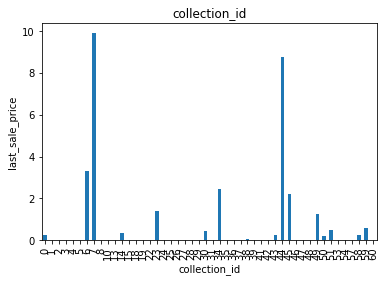

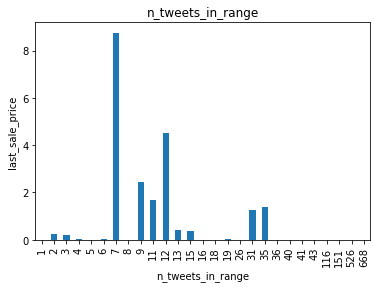

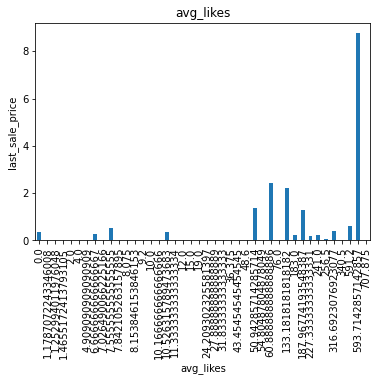

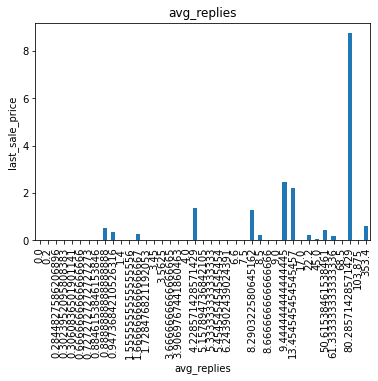

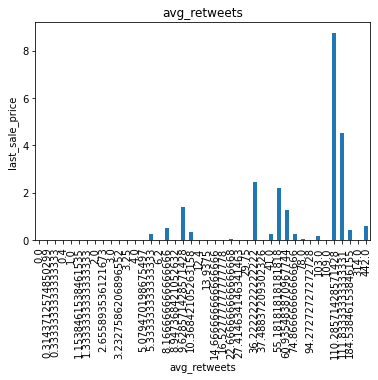

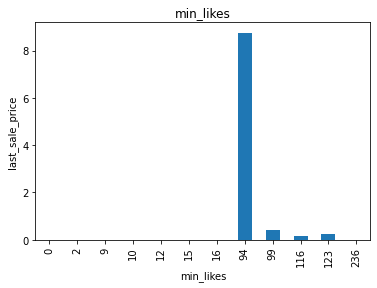

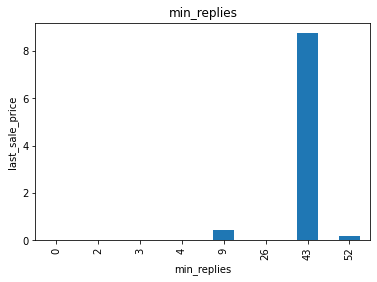

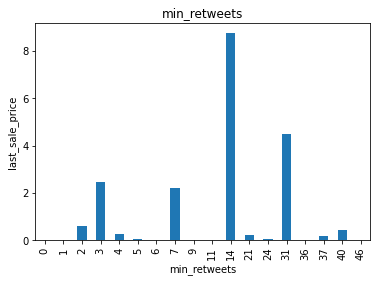

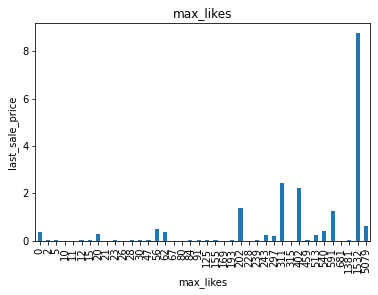

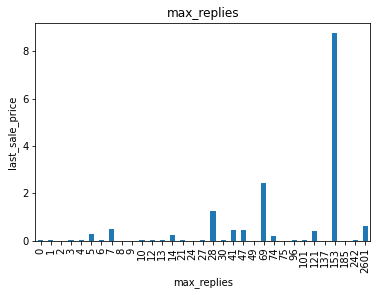

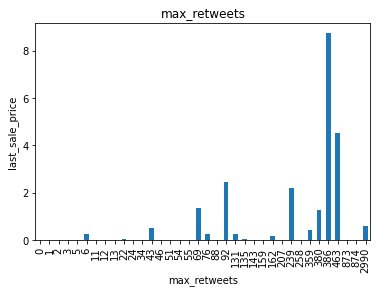

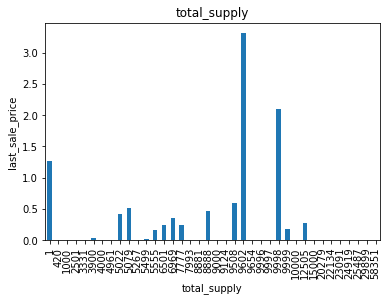

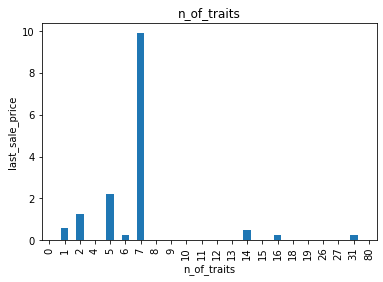

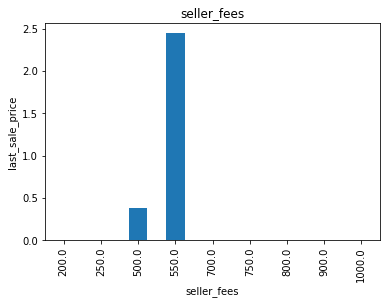

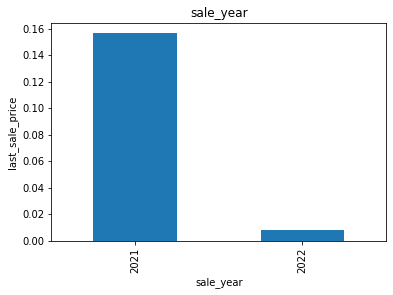

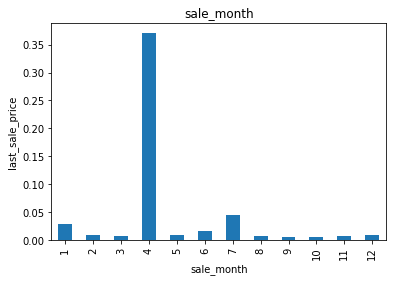

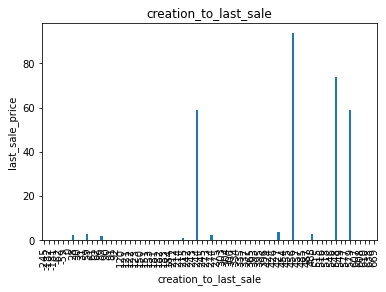

In [93]:
for feature in disc_feature:
    data=df.copy()
    data.groupby(feature)['last_sale_price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('last_sale_price')
    plt.title(feature)
    plt.show()

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


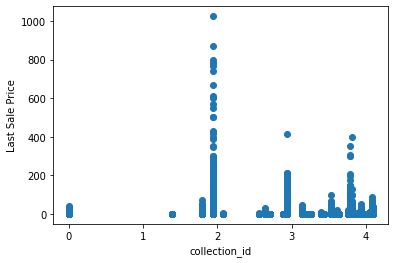

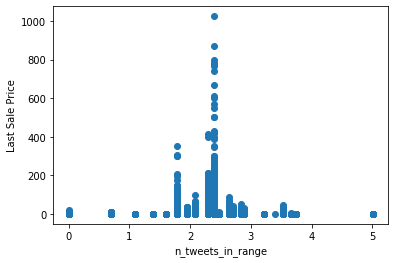

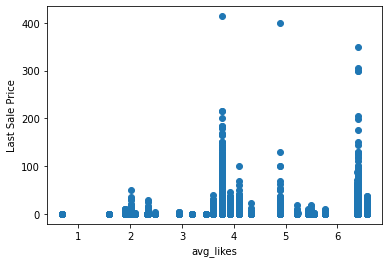

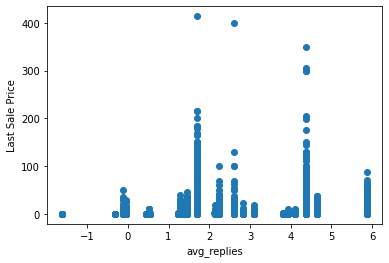

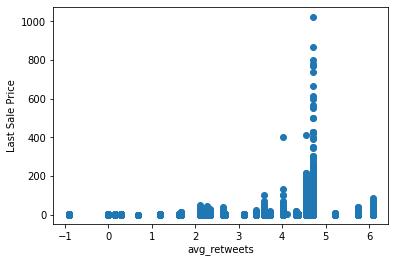

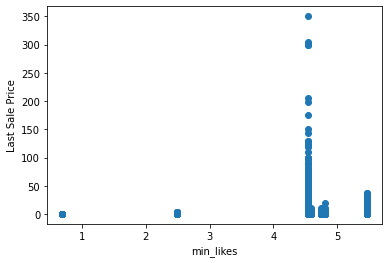

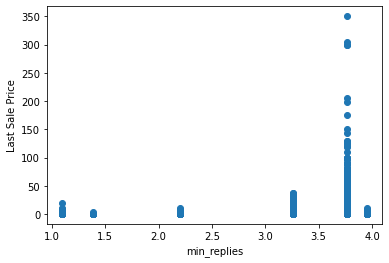

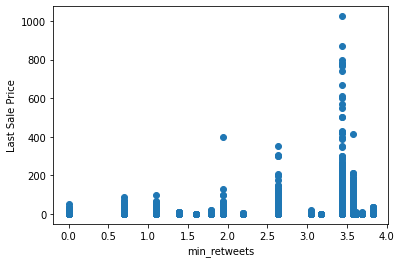

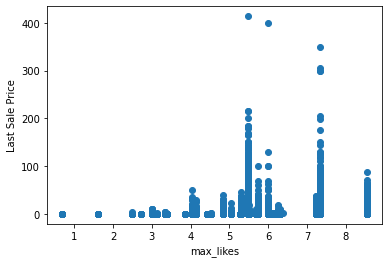

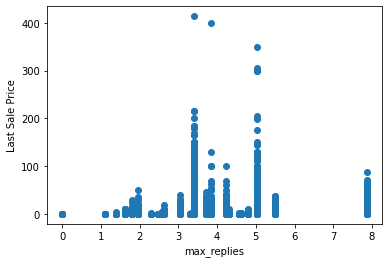

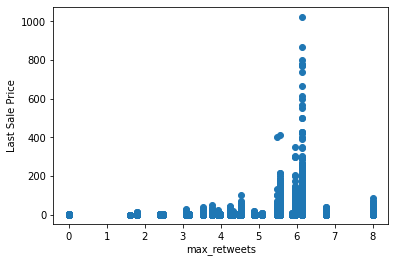

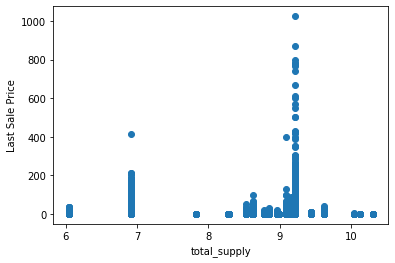

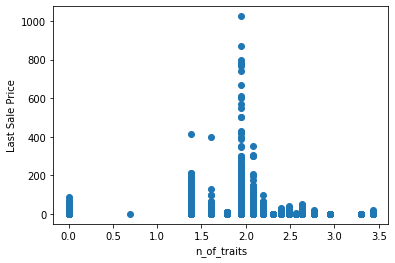

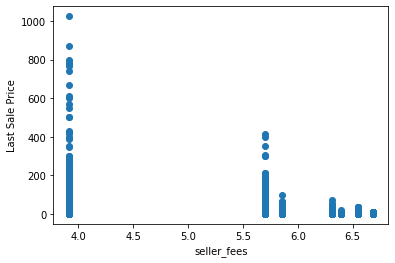

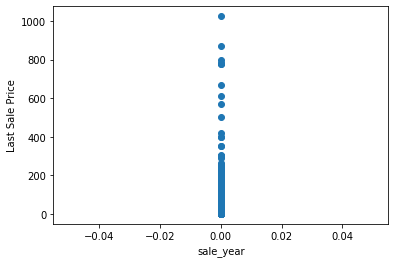

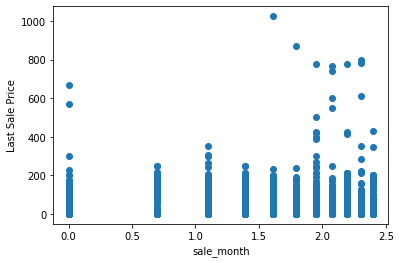

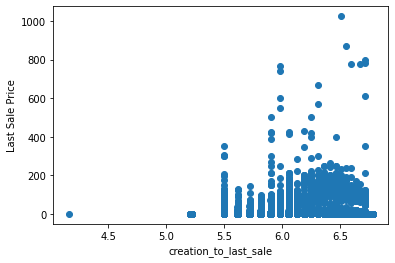

In [94]:
for feature in disc_feature:
    data=df.copy()
    # if 0 in df[feature].unique():
    #     pass
    # else:
    data[feature]=np.log(data[feature]-data[feature].min())
    # df['last_sale_price']=np.log(df['last_sale_price'])
    plt.scatter(data[feature],data['last_sale_price'])
    plt.xlabel(feature)
    plt.ylabel('Last Sale Price')
    plt.show()
    

In [95]:
'''
Only NFT Age shows a trend with the price, the others can be converted to to categorical features'''

'\nOnly NFT Age shows a trend with the price, the others can be converted to to categorical features'

#### Bool to Num

In [96]:
bool_feat=[feature for feature in df.columns if df[feature].dtype==bool]
bool_feat

['openrarity_enabled', 'has_discord', 'has_medium']

In [97]:
def bool_clean(x):
  if x==False:
    return(0)
  else:
    return(1)

In [98]:
for f in bool_feat:
  df[f]=df[f].apply(bool_clean)

In [99]:
df[disc_feature].nunique()

collection_id            48
n_tweets_in_range        27
avg_likes                42
avg_replies              41
avg_retweets             42
min_likes                12
min_replies               8
min_retweets             18
max_likes                40
max_replies              33
max_retweets             36
total_supply             38
n_of_traits              22
seller_fees               9
sale_year                 2
sale_month               12
creation_to_last_sale    70
dtype: int64

In [100]:
df['creation_to_last_sale'].value_counts()

 0      62632
 31     30998
 365    28269
 396    22609
 153    22311
        ...  
-182       13
-59         8
-62         7
-245        2
-181        1
Name: creation_to_last_sale, Length: 70, dtype: int64

In [101]:
include=['sale_year','nft_age']

In [102]:
rest_desc=[f for f in disc_feature if f not in bool_feat]
rest_desc

['collection_id',
 'n_tweets_in_range',
 'avg_likes',
 'avg_replies',
 'avg_retweets',
 'min_likes',
 'min_replies',
 'min_retweets',
 'max_likes',
 'max_replies',
 'max_retweets',
 'total_supply',
 'n_of_traits',
 'seller_fees',
 'sale_year',
 'sale_month',
 'creation_to_last_sale']

In [104]:
# for f in ['nft_id']:
#   df[f+'cat']=f+df[f].astype(str)
#   print(f)

### Dist on Numerical Features

In [105]:
num_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print('Number of numerical vairables are:', len(num_features))
num_features

Number of numerical vairables are: 25


['global_index',
 'nft_id',
 'collection_id',
 'rarity_score',
 'openrarity_score',
 'last_sale_price',
 'n_tweets_in_range',
 'avg_likes',
 'avg_replies',
 'avg_retweets',
 'min_likes',
 'min_replies',
 'min_retweets',
 'max_likes',
 'max_replies',
 'max_retweets',
 'total_supply',
 'n_of_traits',
 'seller_fees',
 'openrarity_enabled',
 'has_discord',
 'has_medium',
 'sale_year',
 'sale_month',
 'creation_to_last_sale']

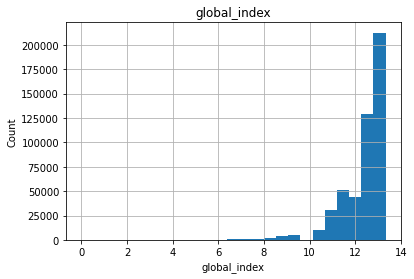

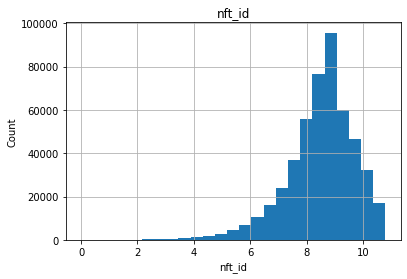

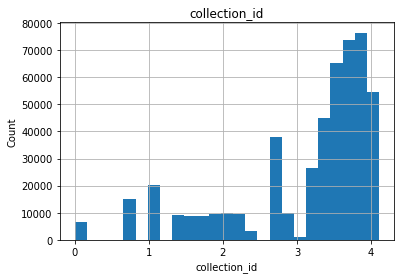

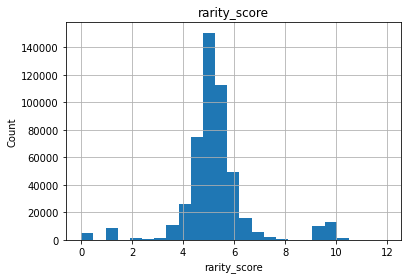

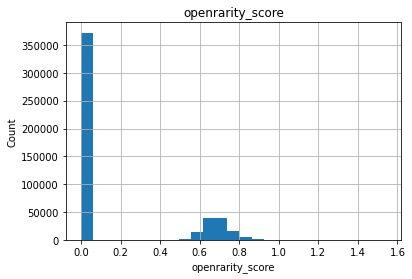

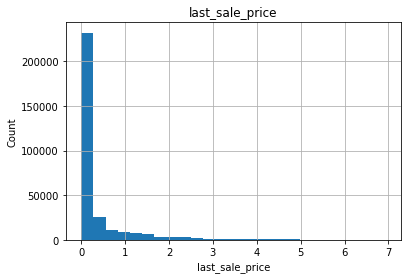

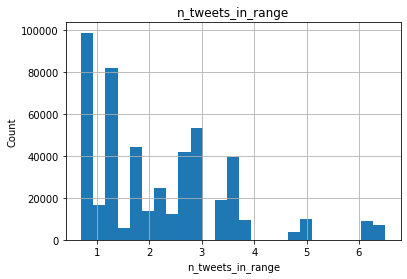

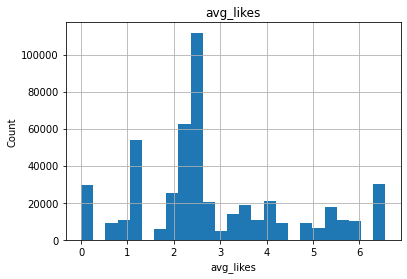

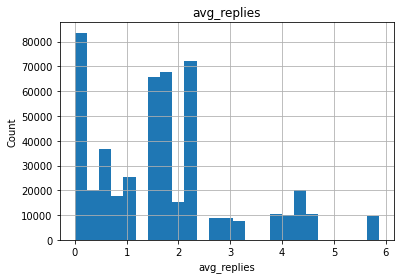

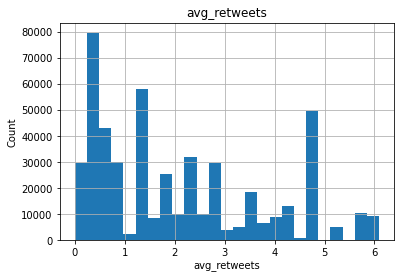

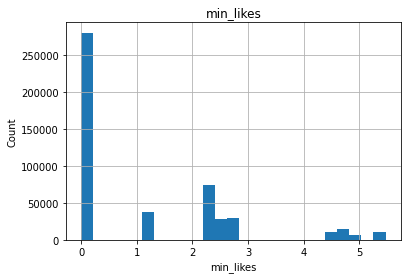

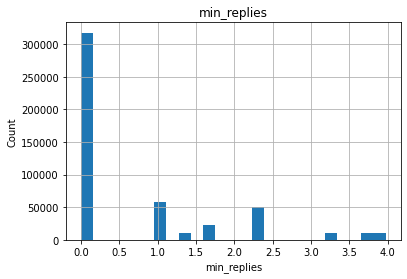

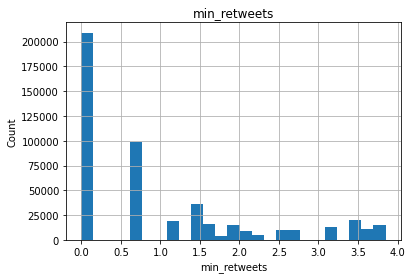

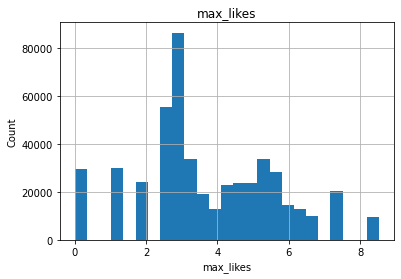

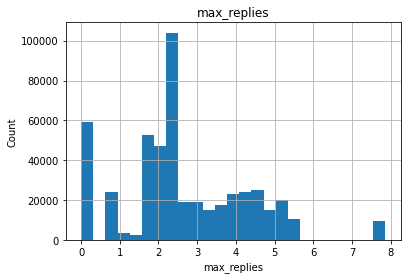

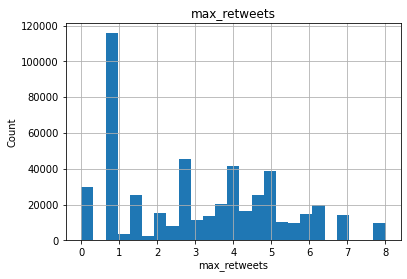

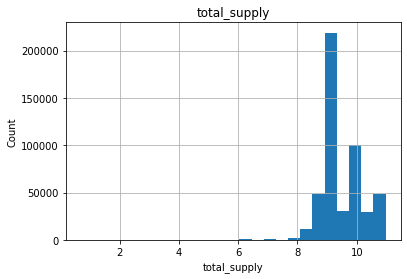

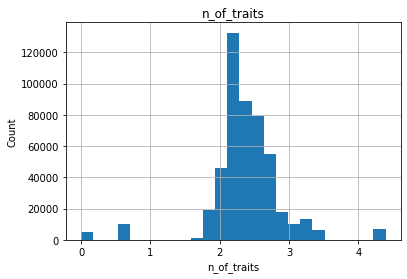

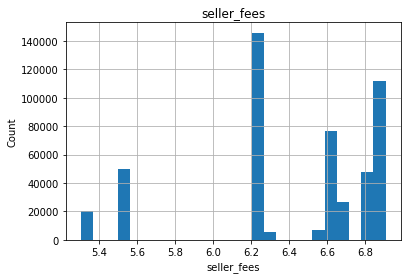

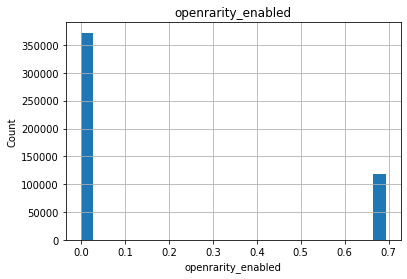

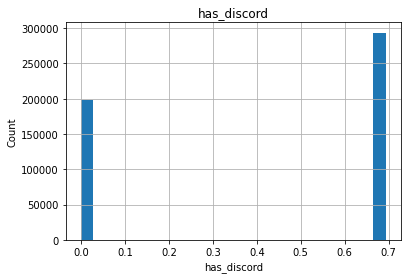

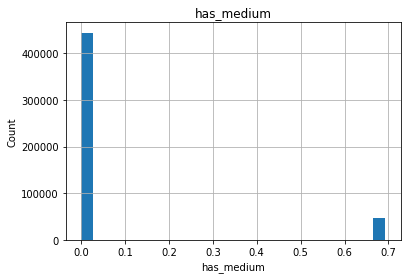

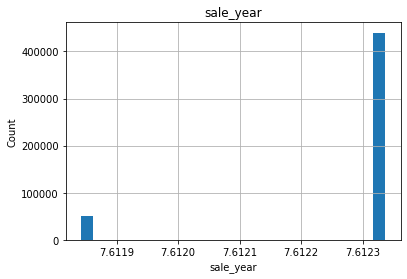

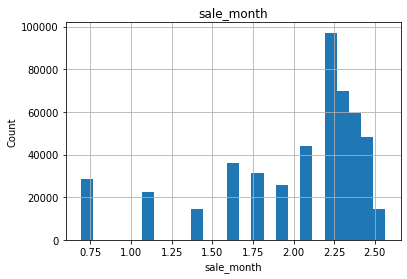

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


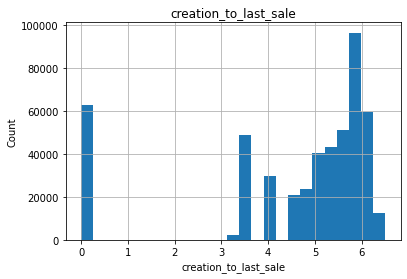

In [106]:
for feature in num_features:
    data=df.copy()
    np.log1p(data[feature]).hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [107]:
'''Many of the continous features are skewed'''

'Many of the continous features are skewed'

### Scatter Plots

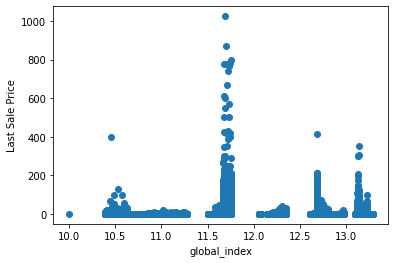

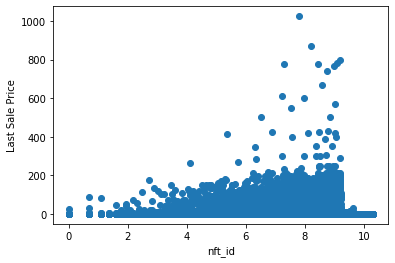

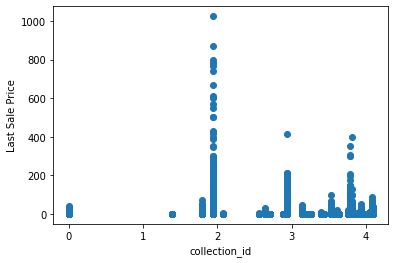

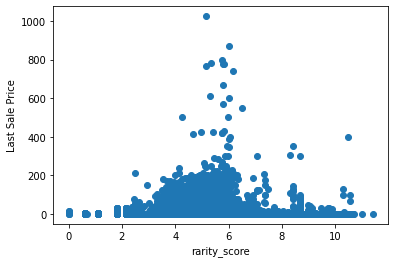

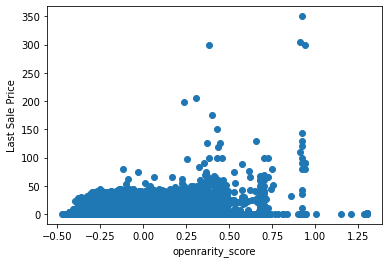

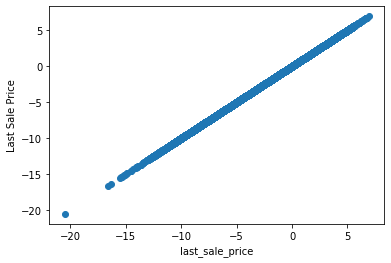

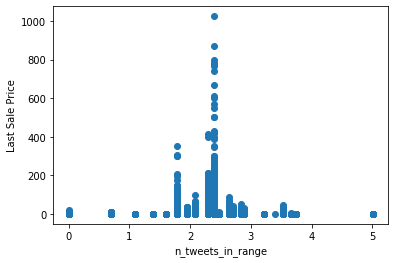

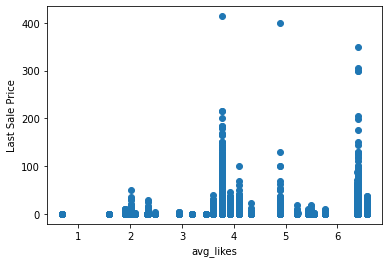

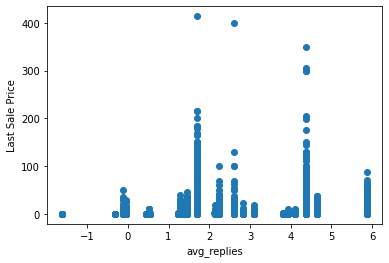

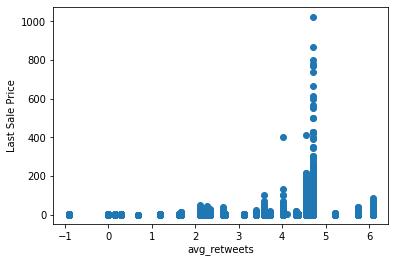

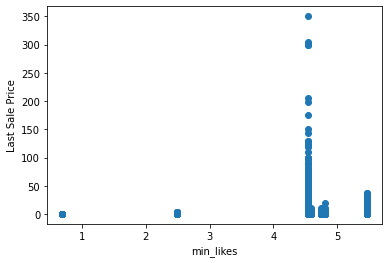

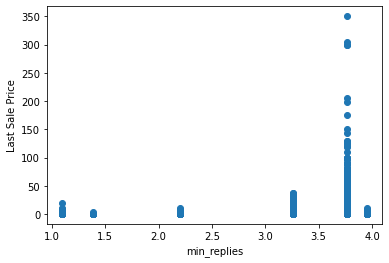

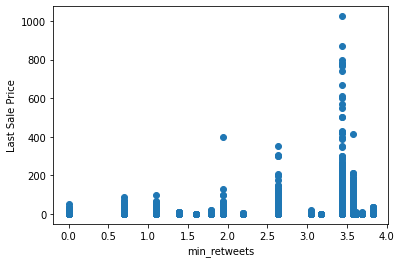

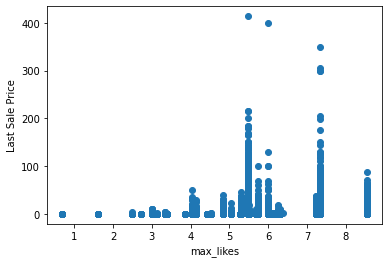

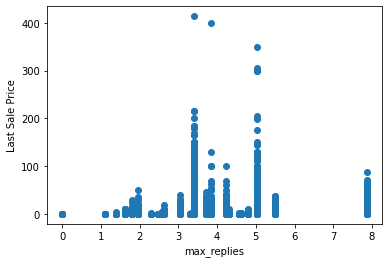

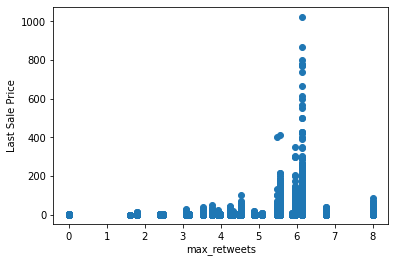

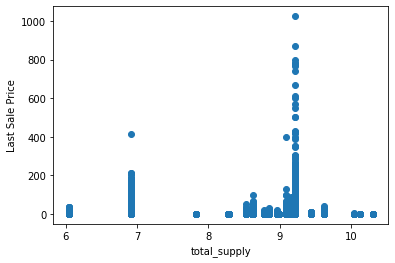

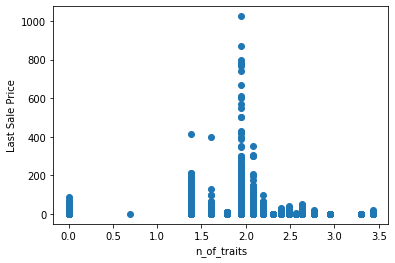

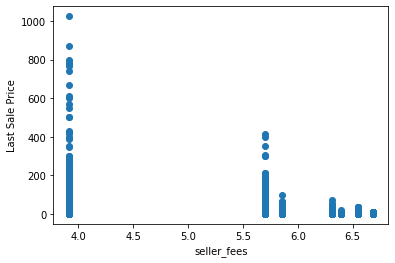

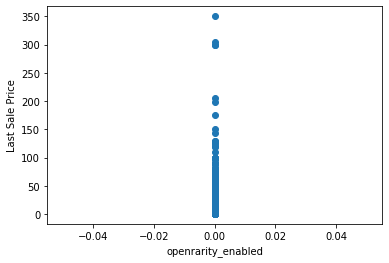

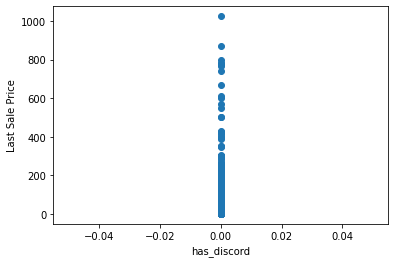

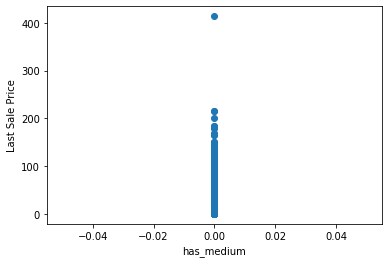

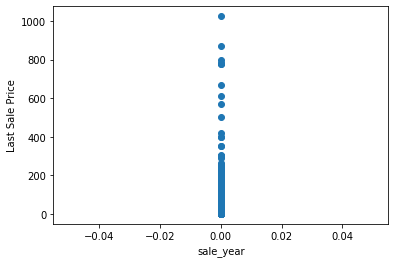

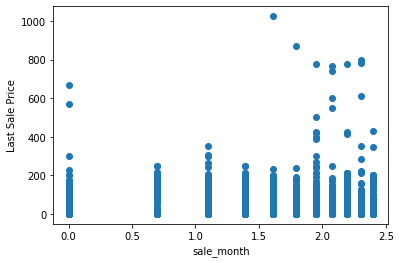

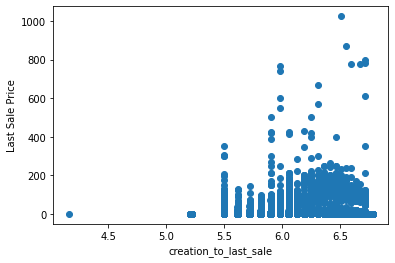

In [108]:
for feature in num_features:
    data=df.copy()
    # if 0 in df[feature].unique():
    #     pass
    # else:
    data[feature]=np.log(data[feature]-data[feature].min())
    # df['last_sale_price']=np.log(df['last_sale_price'])
    plt.scatter(data[feature],data['last_sale_price'])
    plt.xlabel(feature)
    plt.ylabel('Last Sale Price')
    plt.show()
    

### Outliers

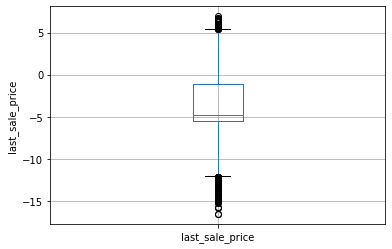

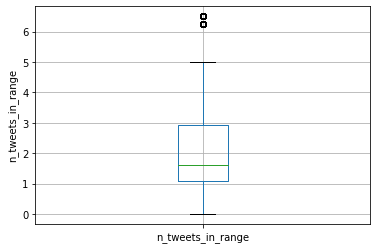

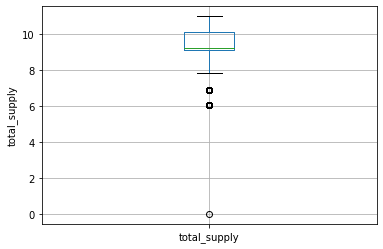

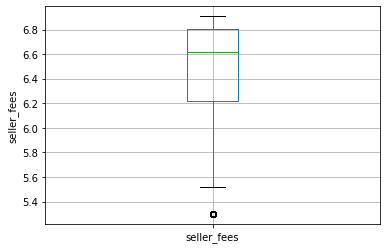

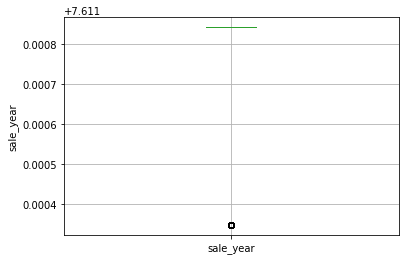

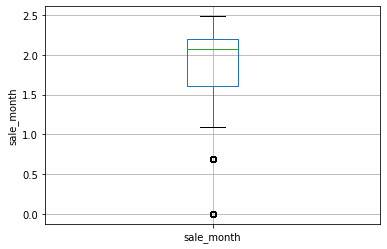

In [109]:
for feature in num_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.show()

In [110]:
'''Significant outliers are present, so algorithms with distance based minimization functions would not work well. Eg; ANNs, Linear Regression'''

'Significant outliers are present, so algorithms with distance bases minimization functions would not work well. Eg; ANNs, Linear Regression'

## Categorical Variables

In [111]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['openrarity_rank',
 'openrarity_max_rank',
 'last_sale_date',
 'creation_date',
 'verification_status',
 'contract_type']

In [112]:
df[categorical_features].nunique()

openrarity_rank        15556
openrarity_max_rank       11
last_sale_date            22
creation_date             19
verification_status        2
contract_type              2
dtype: int64

In [113]:
df[categorical_features].head()

,openrarity_rank,openrarity_max_rank,last_sale_date,creation_date,verification_status,contract_type
0,nan,nan,l_dt_2022-11-01,c_dt_2022-04-01,verified,own
1,nan,nan,l_dt_2021-08-01,c_dt_2021-07-01,verified,own
2,nan,nan,l_dt_2022-08-01,c_dt_2021-07-01,verified,own
3,nan,nan,l_dt_2021-08-01,c_dt_2021-07-01,verified,own
4,nan,nan,l_dt_2022-09-01,c_dt_2021-07-01,verified,own


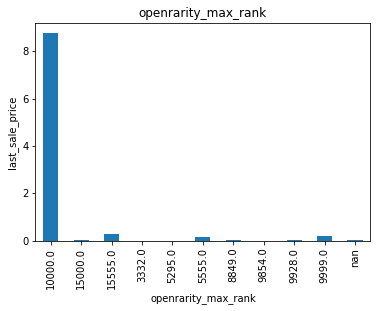

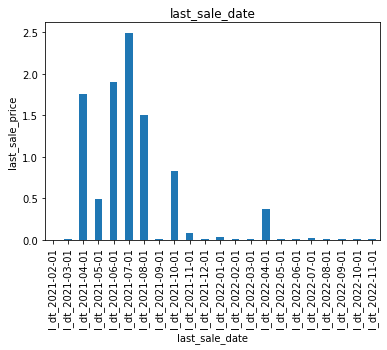

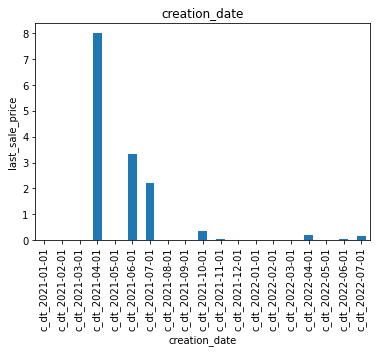

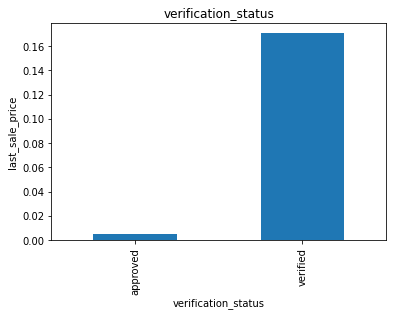

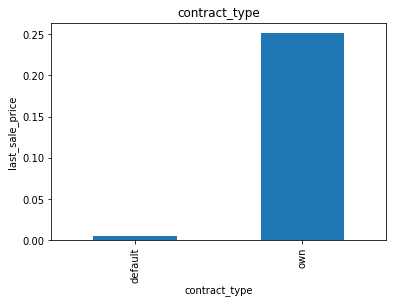

In [114]:
for feature in categorical_features:
  if df[feature].nunique()<25:
    data1=df.copy()
    data1.groupby(feature)['last_sale_price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('last_sale_price')
    plt.title(feature)
    plt.show()

# Feature Engineering

In [115]:
df[num_features].head()

,global_index,nft_id,collection_id,rarity_score,openrarity_score,last_sale_price,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets,total_supply,n_of_traits,seller_fees,openrarity_enabled,has_discord,has_medium,sale_year,sale_month,creation_to_last_sale
0,21928,0,49,2.000000,0.0,1.266732,31,187.967742,8.290323,60.935484,0,0,2,591,28,380,1,2,1000.0,0,1,0,2022,11,214
1,32621,0,45,97.077216,0.0,1.200357,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,5,500.0,0,1,0,2021,8,31
2,32622,1,45,139.453086,0.0,3.180572,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,5,500.0,0,1,0,2022,8,396
3,32623,2,45,127.753445,0.0,3.502910,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,5,500.0,0,1,0,2021,8,31
4,32624,3,45,112.315719,0.0,4.009567,11,133.181818,13.454545,55.181818,0,0,7,402,47,239,8888,5,500.0,0,1,0,2022,9,427


In [116]:
df[num_features].nunique()

global_index             491124
nft_id                    48257
collection_id                48
rarity_score             441865
openrarity_score         103426
last_sale_price          309910
n_tweets_in_range            27
avg_likes                    42
avg_replies                  41
avg_retweets                 42
min_likes                    12
min_replies                   8
min_retweets                 18
max_likes                    40
max_replies                  33
max_retweets                 36
total_supply                 38
n_of_traits                  22
seller_fees                   9
openrarity_enabled            2
has_discord                   2
has_medium                    2
sale_year                     2
sale_month                   12
creation_to_last_sale        70
dtype: int64

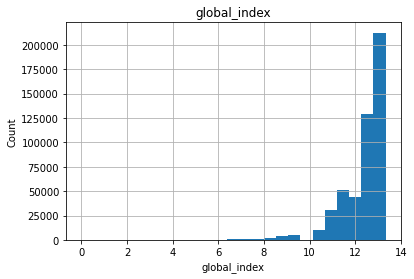

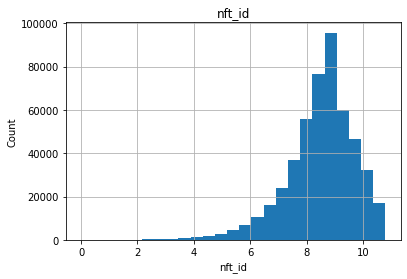

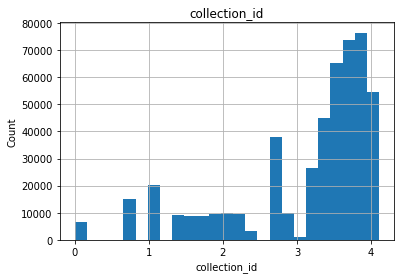

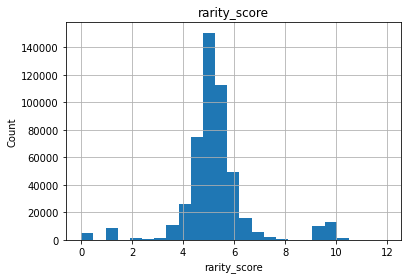

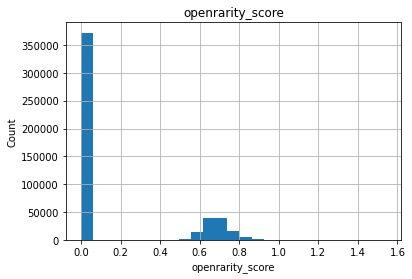

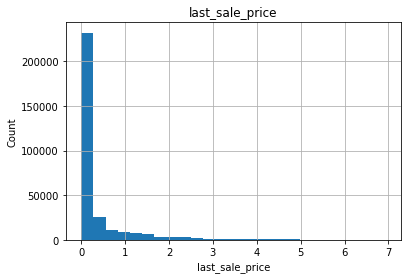

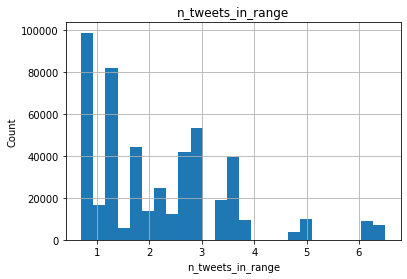

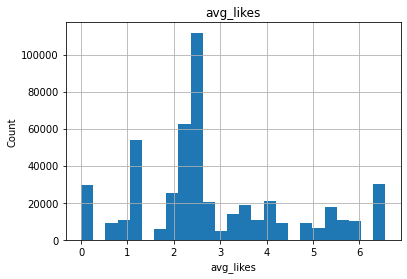

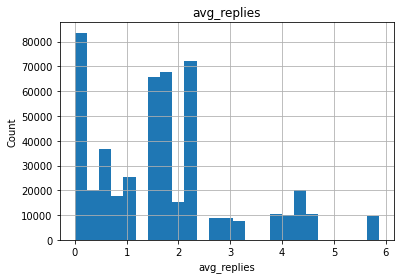

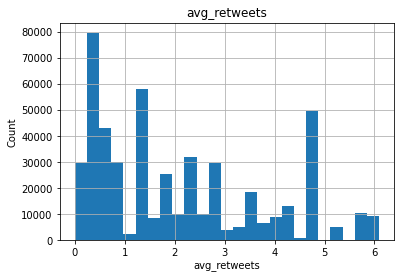

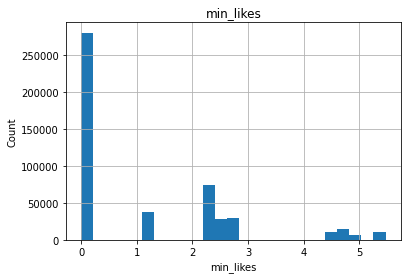

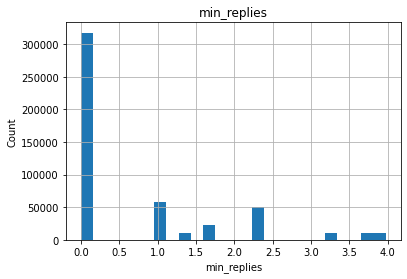

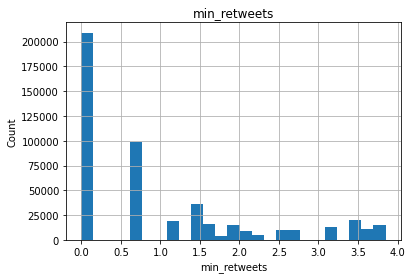

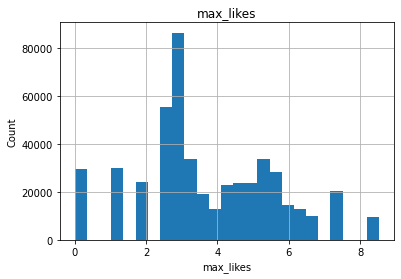

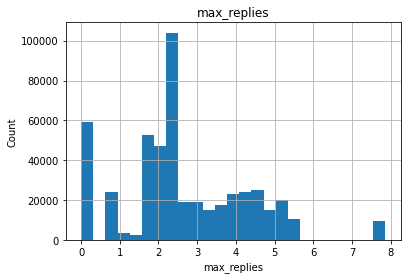

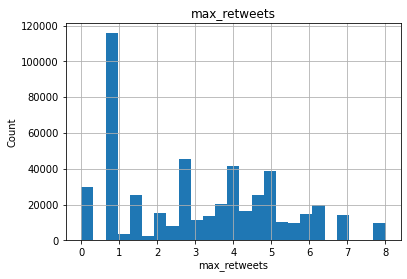

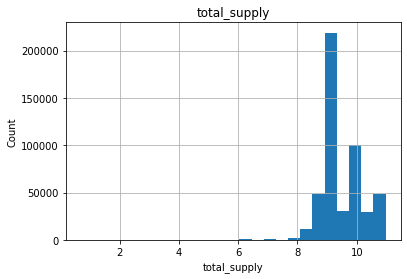

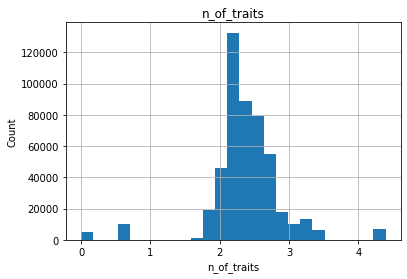

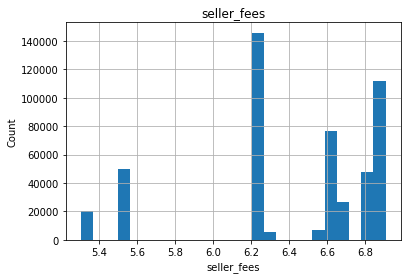

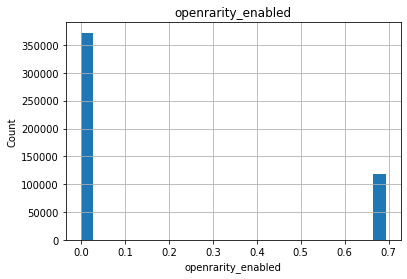

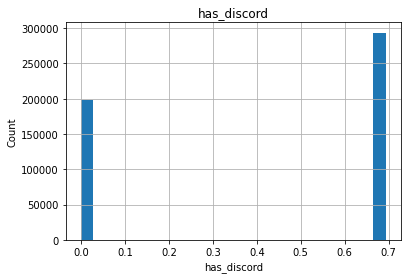

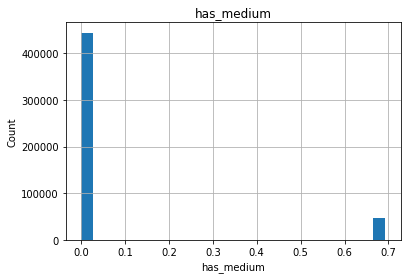

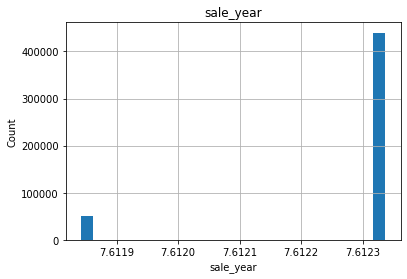

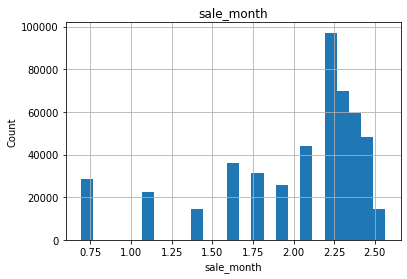

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


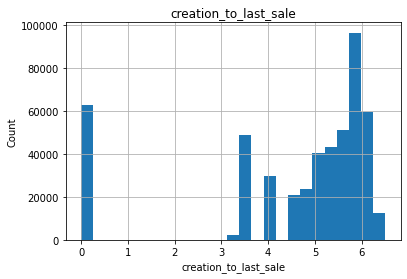

In [117]:
for feature in num_features:
    data=df.copy()
    np.log1p(data[feature]).hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## Log Transformation

In [118]:
log_features=[f for f in num_features if f not in ['last_sale_price']]

In [119]:
for f in log_features:
  df[f]=np.log1p(df[f])
  df[f].fillna(0,inplace=True)

In [120]:
df[num_features].max()

global_index               13.334473
nft_id                     10.784296
collection_id               4.110874
rarity_score               11.937690
openrarity_score            1.539838
last_sale_price          1024.001504
n_tweets_in_range           6.505784
avg_likes                   6.563679
avg_replies                 5.870426
avg_retweets                6.093570
min_likes                   5.468060
min_replies                 3.970292
min_retweets                3.850148
max_likes                   8.533067
max_replies                 7.864036
max_retweets                8.003363
total_supply               10.974249
n_of_traits                 4.394449
seller_fees                 6.908755
openrarity_enabled          0.693147
has_discord                 0.693147
has_medium                  0.693147
sale_year                   7.612337
sale_month                  2.564949
creation_to_last_sale       6.507278
dtype: float64

In [121]:
df[num_features].head()

,global_index,nft_id,collection_id,rarity_score,openrarity_score,last_sale_price,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets,total_supply,n_of_traits,seller_fees,openrarity_enabled,has_discord,has_medium,sale_year,sale_month,creation_to_last_sale
0,9.995565,0.000000,3.912023,1.098612,0.0,1.266732,3.465736,5.241576,2.228973,4.126093,0.0,0.0,1.098612,6.383507,3.367296,5.942799,0.693147,1.098612,6.908755,0.0,0.693147,0.0,7.612337,2.484907,5.370638
1,10.392742,0.000000,3.828641,4.585755,0.0,1.200357,2.484907,4.899196,2.671009,4.028593,0.0,0.0,2.079442,5.998937,3.871201,5.480639,9.092570,1.791759,6.216606,0.0,0.693147,0.0,7.611842,2.197225,3.465736
2,10.392773,0.693147,3.828641,4.944874,0.0,3.180572,2.484907,4.899196,2.671009,4.028593,0.0,0.0,2.079442,5.998937,3.871201,5.480639,9.092570,1.791759,6.216606,0.0,0.693147,0.0,7.612337,2.197225,5.983936
3,10.392803,1.098612,3.828641,4.857899,0.0,3.502910,2.484907,4.899196,2.671009,4.028593,0.0,0.0,2.079442,5.998937,3.871201,5.480639,9.092570,1.791759,6.216606,0.0,0.693147,0.0,7.611842,2.197225,3.465736
4,10.392834,1.386294,3.828641,4.730178,0.0,4.009567,2.484907,4.899196,2.671009,4.028593,0.0,0.0,2.079442,5.998937,3.871201,5.480639,9.092570,1.791759,6.216606,0.0,0.693147,0.0,7.612337,2.302585,6.059123


## Encoding

In [122]:
cat_features=[feature for feature in df.columns if df[feature].dtypes=='O'] 
cat_features

['openrarity_rank',
 'openrarity_max_rank',
 'last_sale_date',
 'creation_date',
 'verification_status',
 'contract_type']

In [123]:
df[cat_features].nunique()

openrarity_rank        15556
openrarity_max_rank       11
last_sale_date            22
creation_date             19
verification_status        2
contract_type              2
dtype: int64

In [124]:
high_features=[feature for feature in cat_features if  df[feature].nunique()>22]
high_features

['openrarity_rank']

In [125]:
df[high_features].nunique()

openrarity_rank    15556
dtype: int64

In [126]:
low_features=[feature for feature in cat_features if feature not in high_features and 'open' not in feature]
low_features

['last_sale_date', 'creation_date', 'verification_status', 'contract_type']

### Target guided mean encoding

In [127]:
# for feature in ['nft_id']:#
#   cat_labels=df.groupby([feature])['last_sale_price'].mean().sort_values().index
#   cat_lables2={k:i for i,k in enumerate(cat_labels,0)}
#   df[feature]=df[feature].map(cat_lables2)
#   print(feature)

### Count Based Label Encoding

In [128]:
cat_features=[feature for feature in df.columns if df[feature].dtypes=='O'] 
cat_features

['openrarity_rank',
 'openrarity_max_rank',
 'last_sale_date',
 'creation_date',
 'verification_status',
 'contract_type']

In [129]:
for feature in low_features:
  dic=df[feature].value_counts().to_dict()
  list1=np.arange(len(dic.values()),0,-1) # If highest rank for high count
  # list1=np.arange(len(dic.values()))
  dic2=dict(zip(list(dic.keys()),list1))
  df[feature]=df[feature].replace(dic2)
  print(feature)

last_sale_date
creation_date
verification_status
contract_type


### One hot Encoding

In [130]:
one_hot_features=[feature for feature in df.columns if df[feature].dtype=='O']
one_hot_features

['openrarity_rank', 'openrarity_max_rank']

#### rare categorical features

#### remove categorical variables that are present less than 1% of the observations

In [131]:
df[one_hot_features].nunique()

openrarity_rank        15556
openrarity_max_rank       11
dtype: int64

In [132]:
for feature in one_hot_features:
    temp=df.groupby(feature)['last_sale_price'].count()/len(df)
    temp_df=temp[temp>0.0005].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],feature+'Rare_var')
# if the feature has less than 1%, create new feature

In [133]:
df[one_hot_features].nunique()

openrarity_rank        2
openrarity_max_rank    9
dtype: int64

In [134]:
def category_onehot_multcols(df,multcolumns):
    df_final=df
    i=0
    for fields in multcolumns:
        print(fields)
        df1=pd.get_dummies(df[fields],drop_first=True)
        df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
    df=pd.concat([df,df_final],axis=1)
        
    return df

In [135]:
df=category_onehot_multcols(df,one_hot_features)

openrarity_rank
openrarity_max_rank


In [136]:
df.head()

,global_index,nft_id,collection_id,rarity_score,openrarity_score,last_sale_date,last_sale_price,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,openrarity_enabled,has_discord,has_medium,sale_year,sale_month,creation_to_last_sale,openrarity_rankRare_var,15000.0,15555.0,5555.0,8849.0,9928.0,9999.0,nan,openrarity_max_rankRare_var
0,9.995565,0.000000,3.912023,1.098612,0.0,18,1.266732,3.465736,5.241576,2.228973,4.126093,0.0,0.0,1.098612,6.383507,3.367296,5.942799,0.693147,18,1,1.098612,2,6.908755,0.0,0.693147,0.0,7.612337,2.484907,5.370638,0,0,0,0,0,0,0,1,0
1,10.392742,0.000000,3.828641,4.585755,0.0,9,1.200357,2.484907,4.899196,2.671009,4.028593,0.0,0.0,2.079442,5.998937,3.871201,5.480639,9.092570,14,1,1.791759,2,6.216606,0.0,0.693147,0.0,7.611842,2.197225,3.465736,0,0,0,0,0,0,0,1,0
2,10.392773,0.693147,3.828641,4.944874,0.0,22,3.180572,2.484907,4.899196,2.671009,4.028593,0.0,0.0,2.079442,5.998937,3.871201,5.480639,9.092570,14,1,1.791759,2,6.216606,0.0,0.693147,0.0,7.612337,2.197225,5.983936,0,0,0,0,0,0,0,1,0
3,10.392803,1.098612,3.828641,4.857899,0.0,9,3.502910,2.484907,4.899196,2.671009,4.028593,0.0,0.0,2.079442,5.998937,3.871201,5.480639,9.092570,14,1,1.791759,2,6.216606,0.0,0.693147,0.0,7.611842,2.197225,3.465736,0,0,0,0,0,0,0,1,0
4,10.392834,1.386294,3.828641,4.730178,0.0,21,4.009567,2.484907,4.899196,2.671009,4.028593,0.0,0.0,2.079442,5.998937,3.871201,5.480639,9.092570,14,1,1.791759,2,6.216606,0.0,0.693147,0.0,7.612337,2.302585,6.059123,0,0,0,0,0,0,0,1,0


In [138]:
df.shape

(491124, 38)

### New Features

I have tried creating few features listed below but none of them have improved performance.

In [143]:
# df['total_likes']=df['avg_likes']*df['n_tweets_in_range']
# df['total_retweets']=df['avg_retweets']*df['n_tweets_in_range']
# df['total_repies']=df['avg_replies']*df['n_tweets_in_range']

In [144]:
# df_collection_count=df.groupby('nft_id').agg({"collection_id":'count'}).reset_index()
# df_collection_count.columns=['nft_id','collection_count']

In [145]:
# df=pd.merge(df,df_collection_count, on=['nft_id'],how='left')

In [146]:
# df.head()

In [147]:
# df_nft_count=df.groupby('collection_id').agg({"nft_id":'count'}).reset_index()
# df_nft_count.columns=['collection_id','nft_count']

In [148]:
# df=pd.merge(df,df_nft_count, on=['collection_id'],how='left')

In [149]:
# df.head()

In [150]:
# df['nft_count']=df.replace(df['nft_id'].value_counts().to_dict())

In [151]:
# tot_nft_count=df.groupby('nft_id').agg({"nft_id":'count'})
# tot_nft_count.columns=['nft_total_count']
# tot_nft_count.reset_index(inplace=True)

In [152]:
# df=pd.merge(df,tot_nft_count, on=['nft_id'],how='left')

In [153]:
# tot_collection_count=df.groupby('collection_id').agg({"collection_id":'count'})
# tot_collection_count.columns=['collection_total_count']
# tot_collection_count.reset_index(inplace=True)

In [154]:
# df=pd.merge(df,tot_collection_count, on=['collection_id'],how='left')

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491124 entries, 0 to 491123
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   global_index                 491124 non-null  float64
 1   nft_id                       491124 non-null  float64
 2   collection_id                491124 non-null  float64
 3   rarity_score                 491124 non-null  float64
 4   openrarity_score             491124 non-null  float64
 5   last_sale_date               491124 non-null  int64  
 6   last_sale_price              309910 non-null  float64
 7   n_tweets_in_range            491124 non-null  float64
 8   avg_likes                    491124 non-null  float64
 9   avg_replies                  491124 non-null  float64
 10  avg_retweets                 491124 non-null  float64
 11  min_likes                    491124 non-null  float64
 12  min_replies                  491124 non-null  float64
 13 

# feature scaling

In [156]:
feature_scale=[feature for feature in df.columns if feature not in ['last_sale_price']]

scaler=StandardScaler()

In [157]:
df[feature_scale]=scaler.fit_transform(df[feature_scale])

In [158]:
final_df=df.copy()
final_df.shape

(491124, 38)

In [159]:
final_df.head()

,global_index,nft_id,collection_id,rarity_score,openrarity_score,last_sale_date,last_sale_price,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,openrarity_enabled,has_discord,has_medium,sale_year,sale_month,creation_to_last_sale,openrarity_rankRare_var,15000.0,15555.0,5555.0,8849.0,9928.0,9999.0,nan,openrarity_max_rankRare_var
0,-2.432025,-6.999358,0.813622,-2.940693,-0.561648,0.122459,1.266732,0.947537,1.439493,0.380163,1.201866,-0.747717,-0.640385,0.082130,1.398811,0.446277,1.400544,-12.259114,1.071204,-1.089063,-2.375507,0.880729,1.037420,-0.565829,0.820615,-0.326514,0.342080,0.958217,0.422459,-0.565829,-0.177495,-0.180854,-0.152135,-0.13576,-0.143638,-0.206027,0.565829,-0.198551
1,-2.026188,-6.999358,0.728050,-0.468541,-0.561648,-2.047277,1.200357,0.208027,1.235307,0.705850,1.144705,-0.747717,-0.640385,0.907442,1.199975,0.747738,1.180244,-0.607367,0.281865,-1.089063,-1.070886,0.880729,-0.424798,-0.565829,0.820615,-0.326514,-2.923295,0.363493,-0.567870,-0.565829,-0.177495,-0.180854,-0.152135,-0.13576,-0.143638,-0.206027,0.565829,-0.198551
2,-2.026157,-6.428333,0.728050,-0.213949,-0.561648,1.086786,3.180572,0.208027,1.235307,0.705850,1.144705,-0.747717,-0.640385,0.907442,1.199975,0.747738,1.180244,-0.607367,0.281865,-1.089063,-1.070886,0.880729,-0.424798,-0.565829,0.820615,-0.326514,0.342080,0.363493,0.741303,-0.565829,-0.177495,-0.180854,-0.152135,-0.13576,-0.143638,-0.206027,0.565829,-0.198551
3,-2.026125,-6.094305,0.728050,-0.275608,-0.561648,-2.047277,3.502910,0.208027,1.235307,0.705850,1.144705,-0.747717,-0.640385,0.907442,1.199975,0.747738,1.180244,-0.607367,0.281865,-1.089063,-1.070886,0.880729,-0.424798,-0.565829,0.820615,-0.326514,-2.923295,0.363493,-0.567870,-0.565829,-0.177495,-0.180854,-0.152135,-0.13576,-0.143638,-0.206027,0.565829,-0.198551
4,-2.026094,-5.857308,0.728050,-0.366154,-0.561648,0.845705,4.009567,0.208027,1.235307,0.705850,1.144705,-0.747717,-0.640385,0.907442,1.199975,0.747738,1.180244,-0.607367,0.281865,-1.089063,-1.070886,0.880729,-0.424798,-0.565829,0.820615,-0.326514,0.342080,0.581304,0.780392,-0.565829,-0.177495,-0.180854,-0.152135,-0.13576,-0.143638,-0.206027,0.565829,-0.198551


In [160]:
final_df.to_csv('data_processed1.csv')

In [162]:
# final_df.to_csv('/content/drive/MyDrive/NFT Price Prediction/dataset/data_processed1.csv')